In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
import itertools

In [4]:
df=pd.read_csv('product b.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [5]:
df.head(15)

,Product Name,Product Category,Month,Year,Sales,Market Size,Marketing Expense,Month No.
Month-Year,,,,,,,,
2019-01-01,Product B,Pain / Analgesic,January,2019,494357,2738080,177316,1
2019-02-01,Product B,Pain / Analgesic,February,2019,837207,4637013,300290,2
2019-03-01,Product B,Pain / Analgesic,March,2019,1278271,7079920,458491,3
2019-04-01,Product B,Pain / Analgesic,April,2019,675985,3744057,242463,4
2019-05-01,Product B,Pain / Analgesic,May,2019,757687,4196578,271768,5
2019-06-01,Product B,Pain / Analgesic,June,2019,1154891,6396559,414237,6
2019-07-01,Product B,Pain / Analgesic,July,2019,459535,2545212,164826,7
2019-08-01,Product B,Pain / Analgesic,August,2019,1136386,6294066,407600,8
2019-09-01,Product B,Pain / Analgesic,September,2019,984890,5454980,353261,9


In [6]:
sales_b= df.drop(['Product Name','Product Category','Month','Year','Month No.'],axis=1)

In [7]:
sales_b.shape

(60, 3)

In [8]:
sales_b.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Sales              60 non-null     int64
 1   Market Size        60 non-null     int64
 2   Marketing Expense  60 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB


In [9]:
print('Total Sales:', sales_b['Sales'].sum())
print('Total Market Size:',sales_b['Market Size'].sum())
print('Total Marketing Expense:', sales_b['Marketing Expense'].sum())

Total Sales: 70016882
Total Market Size: 360874201
Total Marketing Expense: 19873176


Text(0.5, 1.0, 'Product B')

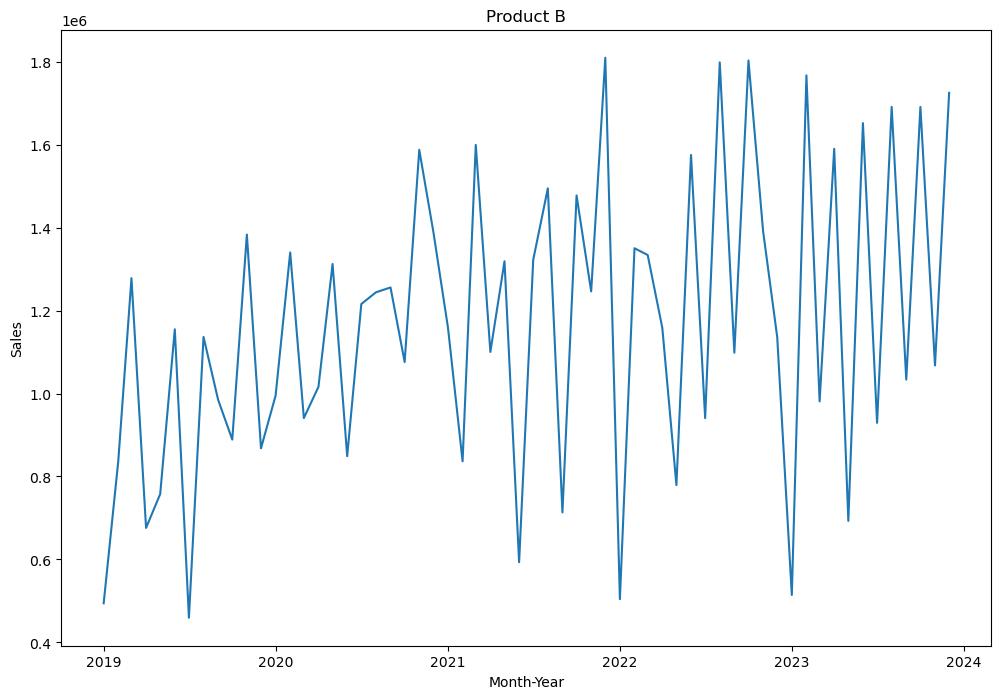

In [10]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_b['Sales'])
plt.title('Product B')

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [13]:
adf_test(sales_b['Sales'])

ADF Statistics: -2.263078907366476
p- value: 0.18415230168794178
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [14]:
sales_b_diff= sales_b['Sales'].diff().dropna()

Text(0.5, 1.0, 'Product B - First Difference')

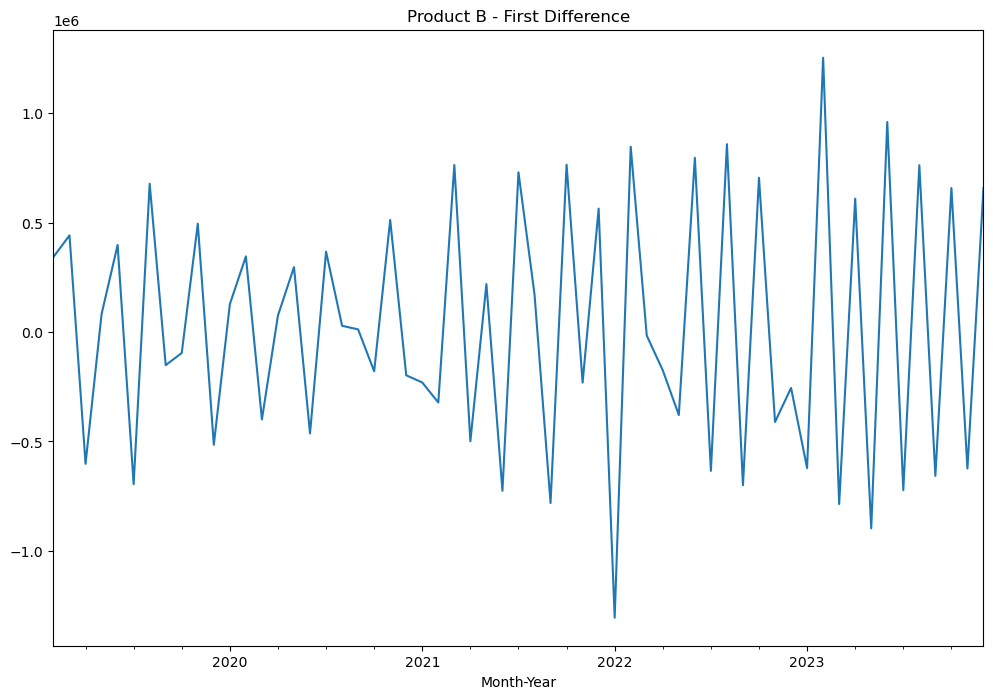

In [15]:
sales_b_diff.plot(figsize=(12,8))
plt.title('Product B - First Difference')

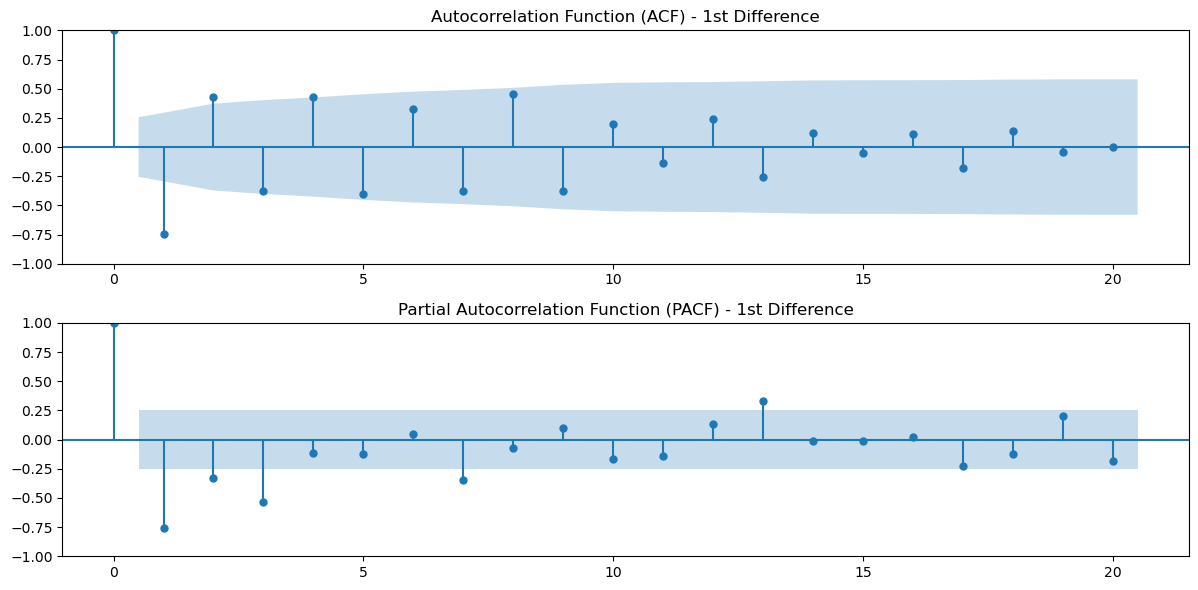

In [16]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_b_diff, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - 1st Difference')

plt.subplot(212)
plot_pacf(sales_b_diff, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - 1st Difference')

plt.tight_layout()
plt.show()

In [17]:
adf_test(sales_b_diff)

ADF Statistics: -10.617041136124557
p- value: 5.639859315327351e-19
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [18]:
train= sales_b[:54]
test=sales_b[54:]

In [19]:
print(len(train),len(test))

54 6


In [20]:
#Finding the best value for ARIMA

#import itertools
#p=d=q=range(0,5)
#pdq = list(itertools.product(p,d,q))

#for param in pdq:
#    try:
#        model_arima = ARIMA(train,order=param)
#        model_arima_fit = model_arima.fit()
#       print(param,model_arima_fit.aic)
#    except:
#        continue
    
# The Akaike information criterion (AIC) is an estimator of in-sample prediction error and thereby relative quality of
# statistical models for a given set of data

# It's like the mean squared error in Regression - The smaller the number, the better

In [21]:
#therefore, the combination p=(0,1,2,3,4,5) d=1 q=(0,1,2,3) must be tested with accuracy metrics and aic

In [22]:
#param = [(0,1,0),(0,1,1),(0,1,2),(0,1,3),(1,1,0),(1,1,1),(1,1,2),(1,1,3),(2,1,0), (2,1,1), (2,1,2),(2,1,3),(3,1,0),(3,1,1),(3,1,2),(3,1,3),(4,1,0),(4,1,1),(4,1,2),(4,1,3),(5,1,0),(5,1,1),(5,1,2),(5,1,3)]

#for p in param:  # Changed 'x' to 'p'
#    model = ARIMA(train, order=p).fit()
#    pred = model.forecast(steps=len(test))
#    mae = mean_absolute_error(test, pred)
#    mape = np.mean(np.abs((test - pred) / test)) * 100
#    mse=mean_squared_error(test, pred)
#    rmse = np.sqrt(mean_squared_error(test, pred))
#    print(p)
#    print(f'MAE: {mae}')
#    print(f'MSE: {mse}')
#    print(f'RMSE: {rmse}')
#    print('A.I.C:', model.aic)

In [23]:
order=[]
for p in range(5):
    # Loop over MA order
    for q in range(4):
        # Fit model        
#       model= ARIMA(sales_b, order=(p,1,q))
        model_t = ARIMA(train['Sales'], order=(p,1,q), exog=train[['Market Size','Marketing Expense']])
        model_test=model_t.fit() 
        pred=model_test.predict(start=len(train), end=(len(sales_b)-1), exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mape = np.mean(np.abs((test['Sales'] - pred) / test)) * 100
        mse=mean_squared_error(test['Sales'], pred)
        rmse = np.sqrt(mean_squared_error(test['Sales'], pred))
        # Add order and scores to list        
        order.append((p, q, model_test.aic, model_test.bic,mae, mse, rmse))
#Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order, columns=['p','q', 'aic', 'bic', 'mae','mse', 'rmse'])

In [24]:
# Sort by AIC
print(order_df.sort_values('aic'))

    p  q          aic          bic           mae           mse          rmse
7   1  3  1340.579675  1354.371718   7077.441387  7.910644e+07   8894.180235
10  2  2  1341.823703  1355.615746   7029.231121  8.466492e+07   9201.354231
11  2  3  1341.975342  1357.737678   7934.933310  9.470585e+07   9731.693297
15  3  3  1343.771696  1361.504323   6998.515322  8.705341e+07   9330.241865
19  4  3  1344.683840  1364.386759  11248.711133  2.125630e+08  14579.541689
6   1  2  1345.920441  1357.742193   8863.739137  1.129948e+08  10629.901572
12  3  0  1345.975500  1357.797252   5260.267233  3.378589e+07   5812.563146
4   1  0  1346.678160  1354.559327   8585.328908  8.577104e+07   9261.265659
3   0  3  1346.707128  1358.528879  21380.232759  6.423675e+08  25344.970168
1   0  1  1347.206720  1355.087887   8559.920400  8.867533e+07   9416.757924
16  4  0  1347.482968  1361.275011   3383.894574  1.388590e+07   3726.378967
8   2  0  1347.823235  1357.674695   8518.223262  8.532444e+07   9237.123148

In [25]:
m_arima= ARIMA(train['Sales'], order=(1,1,3), exog=train[['Market Size','Marketing Expense']])
model_arima=m_arima.fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   54
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -663.290
Date:                Thu, 09 May 2024   AIC                           1340.580
Time:                        15:45:37   BIC                           1354.372
Sample:                    01-01-2019   HQIC                          1345.883
                         - 06-01-2023                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.2575      0.012     20.866      0.000       0.233       0.282
Marketing Expense    -1.1625      0.232     -5.021      0.000      -1.616      -0.709
ar.L1                -0.

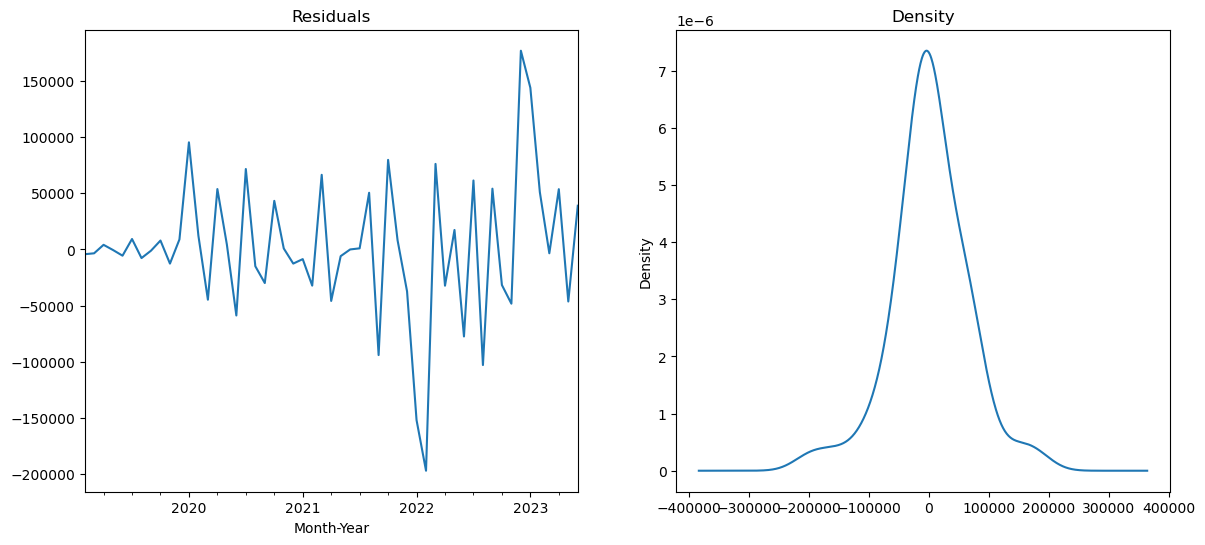

In [26]:
residuals= model_arima.resid[1:]
fig,ax=plt.subplots(1,2, figsize=(14, 6))
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

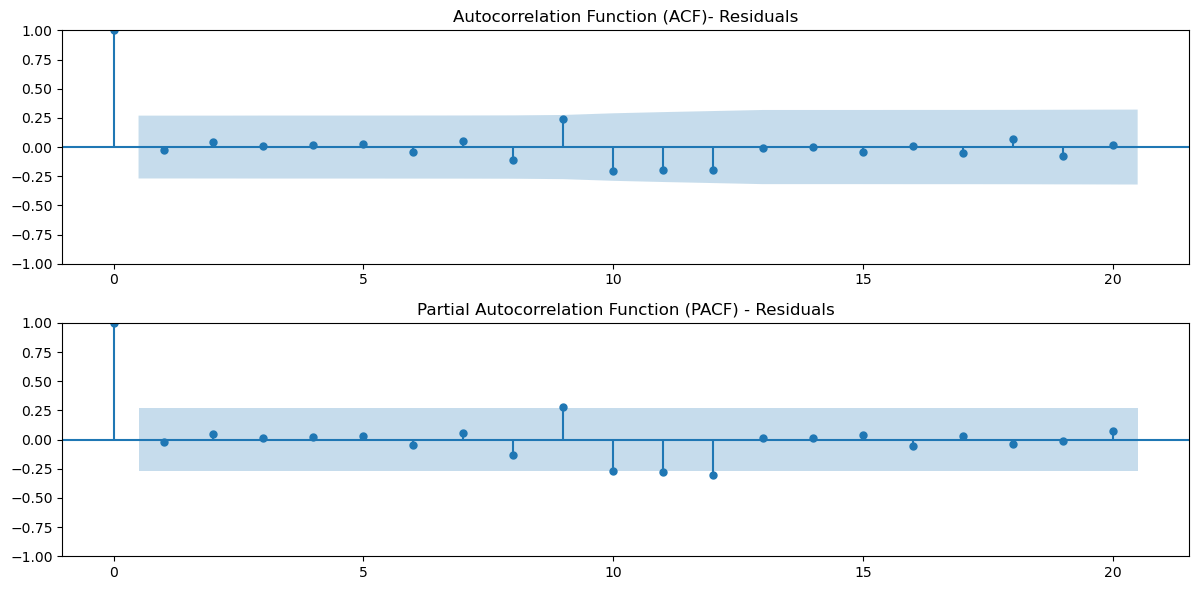

In [27]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)- Residuals')

plt.subplot(212)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Residuals')

plt.tight_layout()
plt.show()

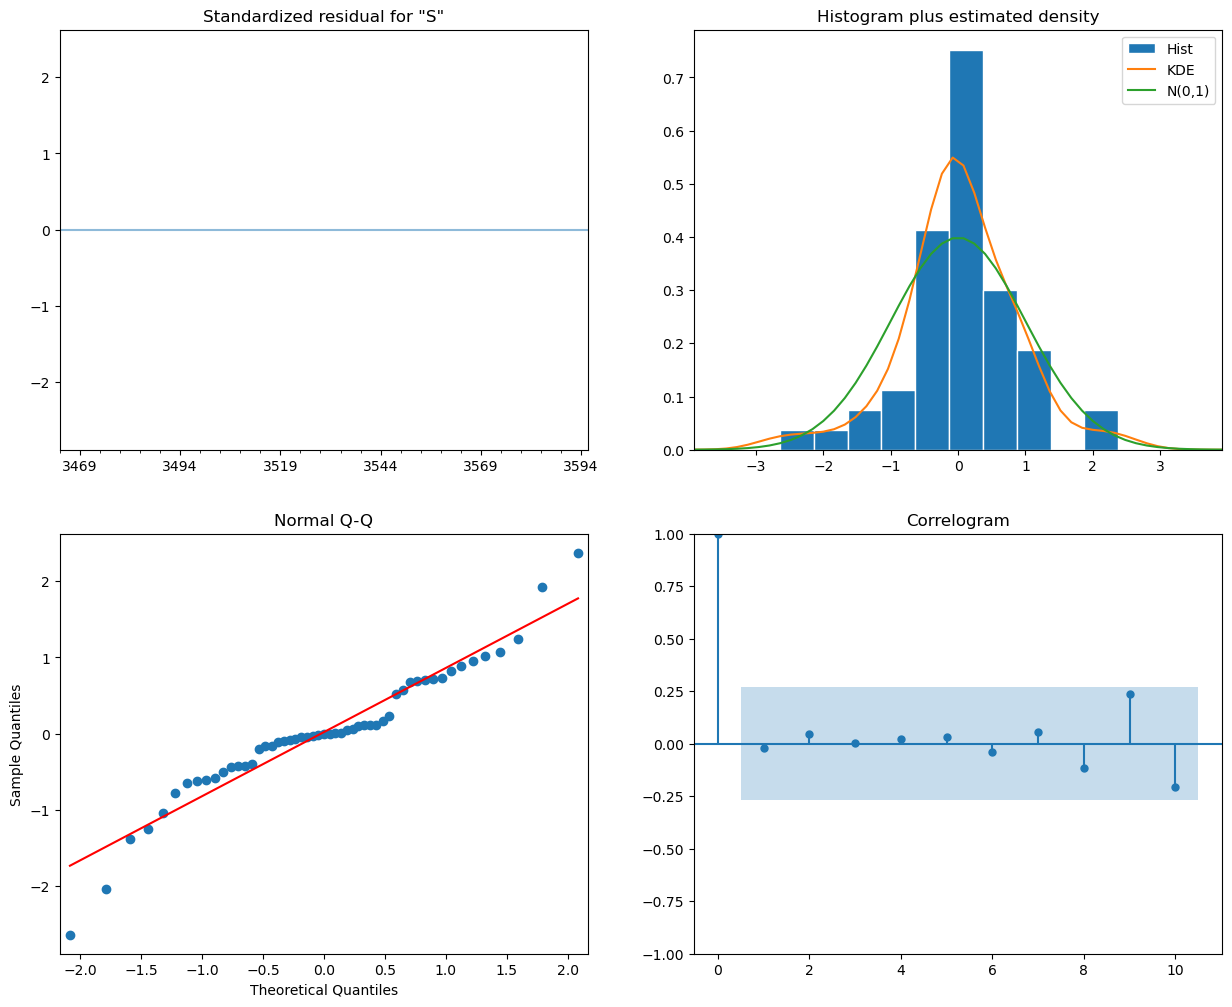

In [28]:
# Create the 4 diagostics plots
model_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [29]:
#pred_in_sample = model_arima.get_prediction(start=len(train), end=(len(sales_b)-1))
#sales_b['Forecast_ARIMA_p']=[None]*len(train) + list(pred)

In [30]:
#plt.figure(figsize=(12, 8))
#sns.lineplot(sales_b[['Sales','Forecast_ARIMA_p']])
#plt.title('Product B')
#plt.show()

In [31]:
pred=model_arima.predict(start=len(train), end=(len(sales_b)-1), exog=test[['Market Size','Marketing Expense']], dynamic = True)
sales_b['Forecast_ARIMAX']=[None]*len(train) + list(pred)
#sales_b.plot()

In [32]:
#pred=model_arima.forecast(steps= len(test))
#sales_b['Forecast_ARIMA']=[None]*len(train) + list(pred)
#sales_b.plot()

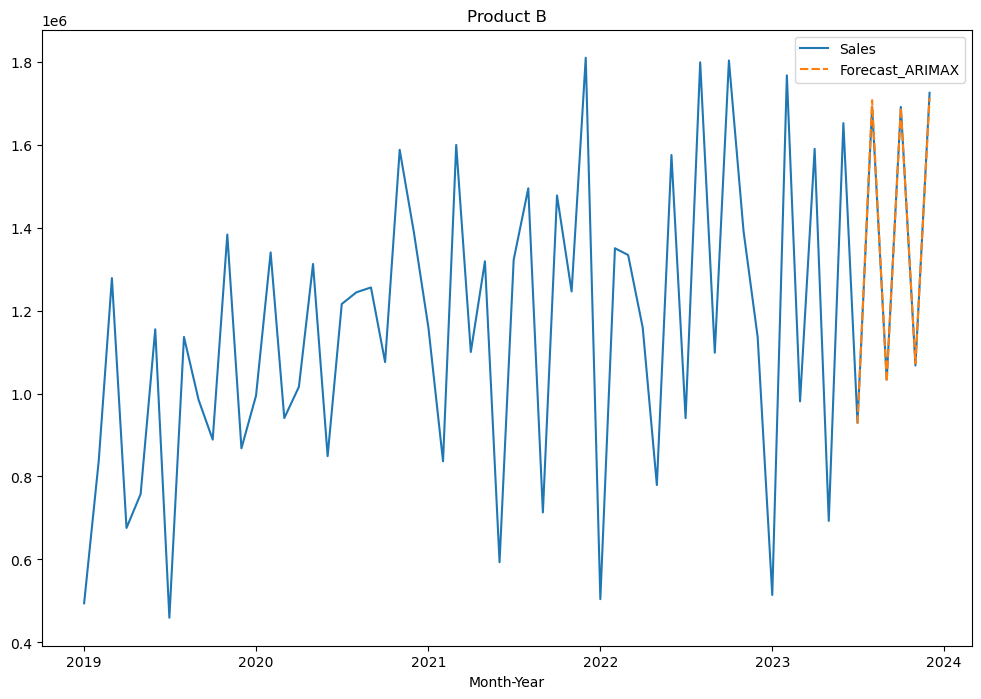

In [33]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_b[['Sales','Forecast_ARIMAX']])
plt.title('Product B')
plt.show()

In [34]:
mae_arimax= mean_absolute_error(test['Sales'],pred)
mse_arimax=mean_squared_error(test['Sales'], pred)
mape_arimax= mean_absolute_percentage_error(test['Sales'],pred)
rmse_arimax= np.sqrt(mean_squared_error(test['Sales'],pred))

print(f'MAE - ARIMAX: {mae_arimax}')
print(f'MAPE - ARIMAX: {mape_arimax}')
print(f'MSE - ARIMAX: {mse_arimax}')
print(f'RMSE - ARIMAX: {rmse_arimax}')

MAE - ARIMAX: 7077.4413870878825
MAPE - ARIMAX: 0.004927363415067391
MSE - ARIMAX: 79106442.0503157
RMSE - ARIMAX: 8894.18023486795


# SARIMA

In [35]:
import statsmodels.api as sm

In [36]:
# Plot
#fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
#axes[0].plot(sales_b['Sales'], label='Original Series')
#axes[0].plot(sales_b['Sales'].diff(1), label='Usual Differencing')
#axes[0].set_title('Usual Differencing')
#axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
#axes[1].plot(sales_b['Sales'], label='Original Series')
#axes[1].plot(sales_b['Sales'].diff(12), label='Seasonal Differencing', color='green')
#axes[1].set_title('Seasonal Differencing')
#plt.legend(loc='upper left', fontsize=10)
#plt.suptitle('Product B', fontsize=16)
#plt.show()

In [37]:
# Plot ACF and PACF
#plt.figure(figsize=(12, 6))
#plt.subplot(211)
#plot_acf(sales_b['Sales'].diff(12).dropna(), lags=22, ax=plt.gca())
#plt.title('Autocorrelation Function (ACF) - Seasonal Difference')

#plt.subplot(212)
#plot_pacf(sales_b['Sales'].diff(12).dropna(), lags=22, ax=plt.gca())
#plt.title('Partial Autocorrelation Function (PACF) - Seasonal Difference')

#plt.tight_layout()
#plt.show()

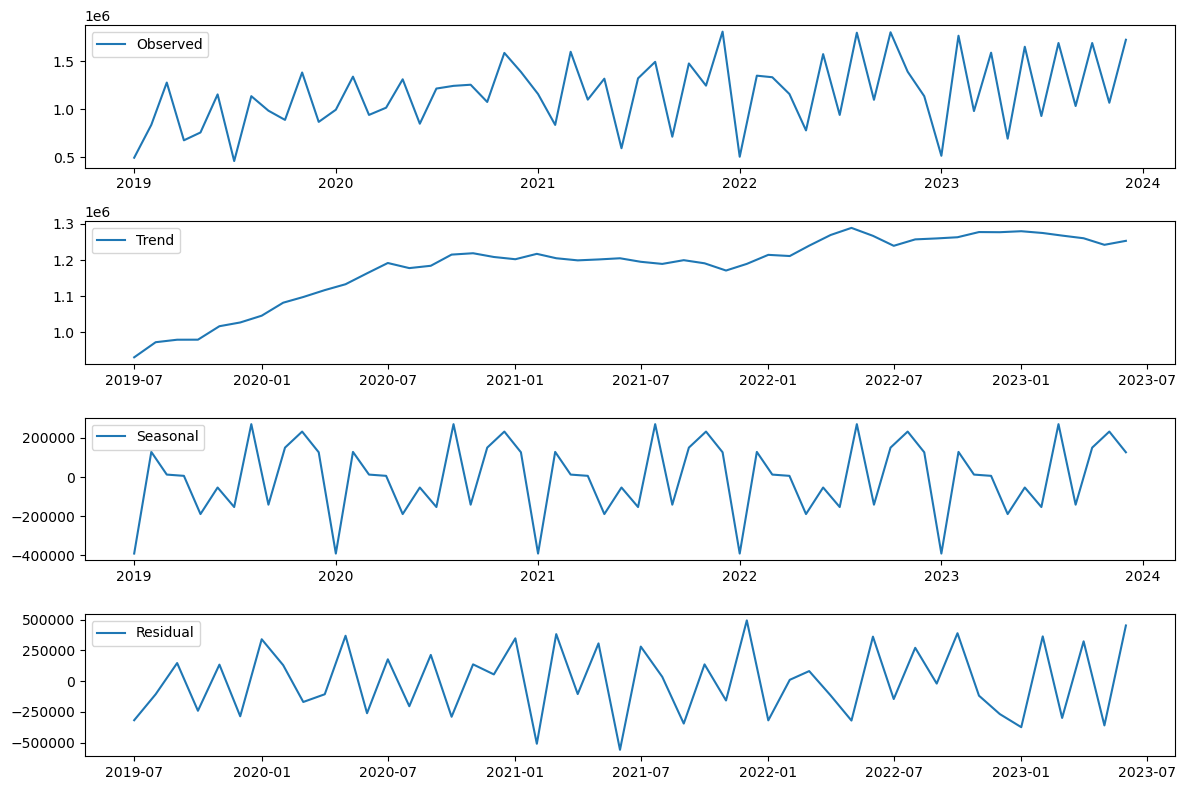

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_b['Sales'], model='additive', period=12)

# Plot the decomposition
#fig = decomposition.plot(figsize=(12,8))
#plt.show()
# Create a new figure with the specified size
plt.figure(figsize=(12, 8))

# Plot each component separately
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

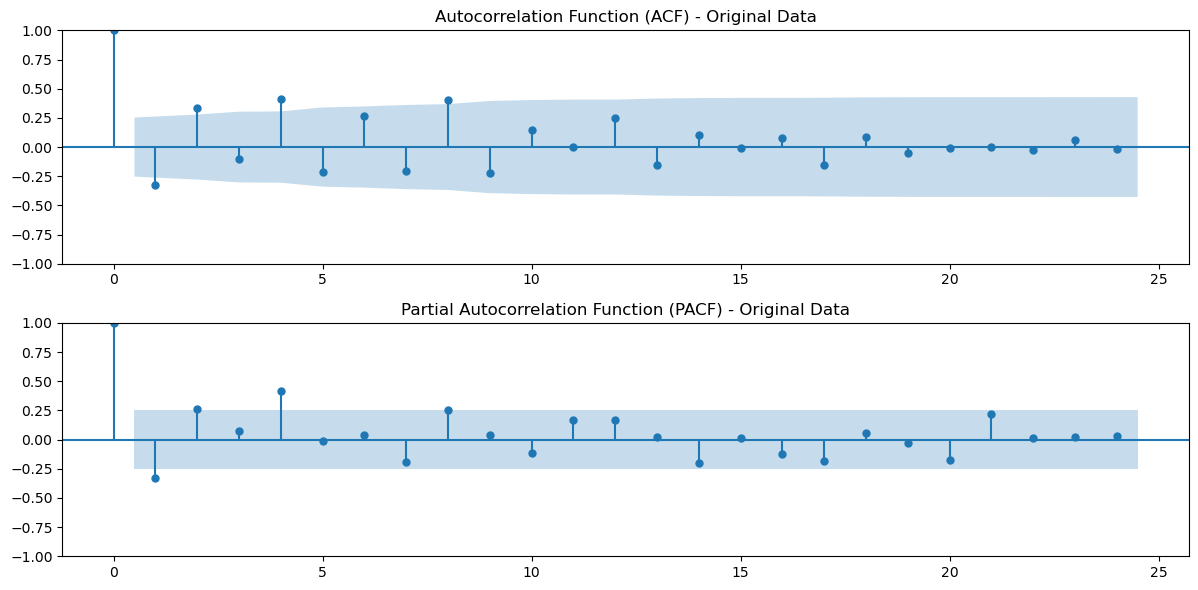

In [39]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_b['Sales'], lags=24, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Original Data')

plt.subplot(212)
plot_pacf(sales_b['Sales'], lags=24, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Original Data')

plt.tight_layout()
plt.show()

In [42]:
order_SARIMAX=[]
# Loop over P order
for P in range(4):
    # Loop over Q order
    for Q in range(4):
        # Fit model
        model_s = sm.tsa.statespace.SARIMAX(train['Sales'], order=(1, 1, 3), seasonal_order=(P, 0, Q, 12),exog=train[['Market Size','Marketing Expense']])
        model_test_s = model_s.fit() 
        pred = model_test_s.predict(start=54, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mse = mean_squared_error(test['Sales'], pred)
        # Add order and scores to list        
        order_SARIMAX.append((P, Q, model_test_s.aic, model_test_s.bic, mae, mse))

# Make DataFrame of model order and scores
order_SARIMAX_df = pd.DataFrame(order_SARIMAX, columns=['P', 'Q', 'aic', 'bic', 'mae', 'mse'])


In [43]:
# Sort by AIC
print(order_SARIMAX_df.sort_values('aic'))

    P  Q          aic          bic           mae           mse
1   0  1  1339.519371  1355.281707  20931.605138  7.237126e+08
4   1  0  1339.698969  1355.461304  22361.703484  6.253195e+08
0   0  0  1340.579675  1354.371718   7077.441387  7.910644e+07
2   0  2  1341.407606  1359.140233  22888.067972  7.286107e+08
5   1  1  1341.566299  1359.298926  21352.990798  7.789990e+08
8   2  0  1341.656681  1359.389309  20156.852620  7.362726e+08
3   0  3  1343.361734  1363.064654  21512.832627  6.617396e+08
9   2  1  1343.576054  1363.278973  19708.250114  6.703244e+08
6   1  2  1343.837821  1363.540740  19936.264248  7.150802e+08
12  3  0  1343.968608  1363.671527  17104.872430  6.101799e+08
13  3  1  1345.377631  1367.050842  18886.338196  4.561901e+08
7   1  3  1345.481148  1367.154360  19305.745364  4.784374e+08
10  2  2  1345.659257  1367.332468  19816.497165  6.053963e+08
14  3  2  1347.468720  1371.112223  18419.706690  4.521377e+08
11  2  3  1347.642852  1371.286355  20065.226127  6.434

In [44]:
sarima=sm.tsa.statespace.SARIMAX(train['Sales'],order=(1, 1, 3),seasonal_order=(0,0,1,12),exog=train[['Market Size','Marketing Expense']])
sarima_model=sarima.fit()
print(sarima_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                Sales   No. Observations:                   54
Model:             SARIMAX(1, 1, 3)x(0, 0, [1], 12)   Log Likelihood                -661.760
Date:                              Thu, 09 May 2024   AIC                           1339.519
Time:                                      15:50:12   BIC                           1355.282
Sample:                                  01-01-2019   HQIC                          1345.581
                                       - 06-01-2023                                         
Covariance Type:                                opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.2660      0.018     15.074      0.000       0.231       0.30

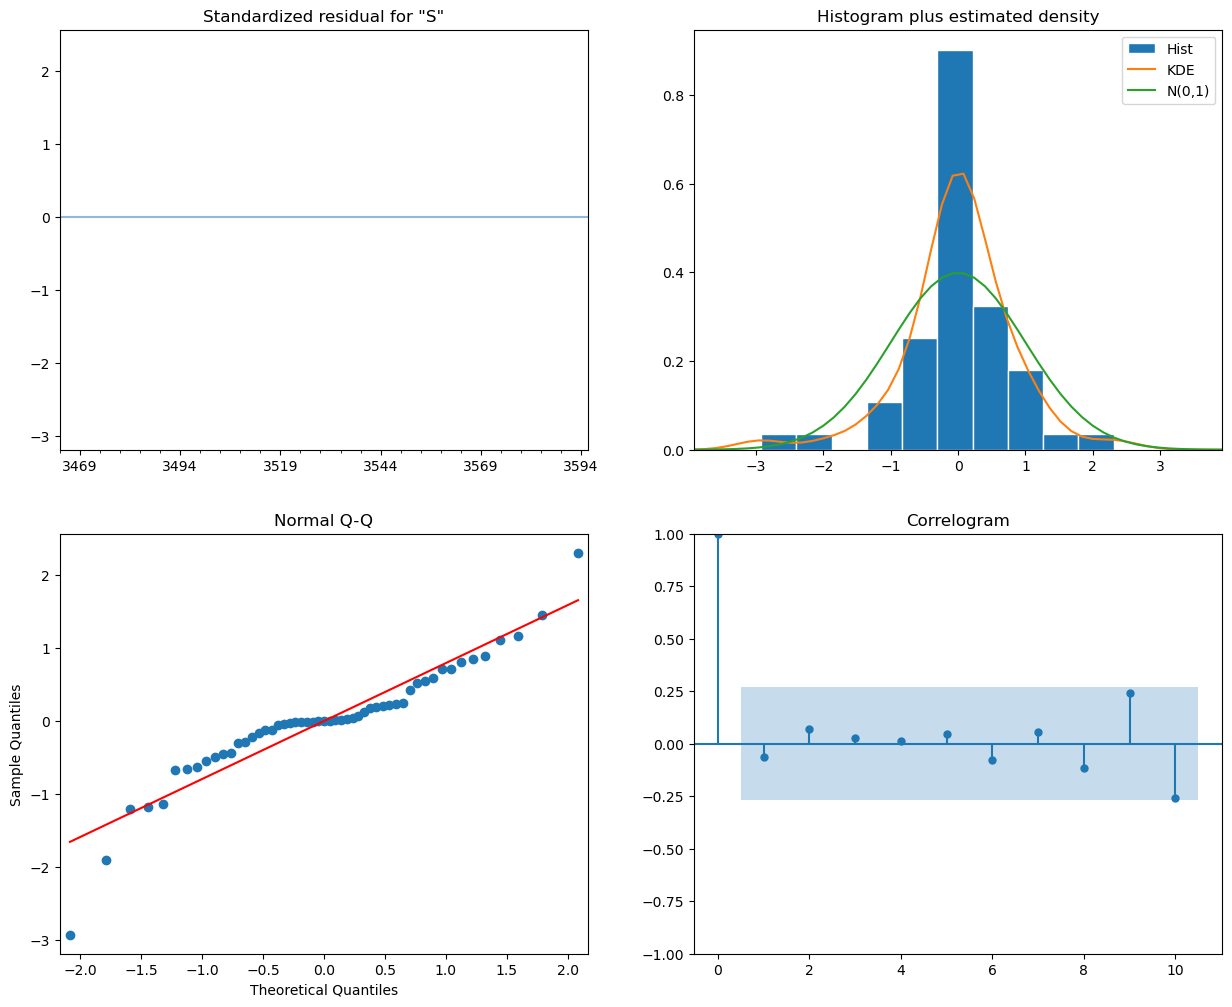

In [45]:
sarima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [46]:
forecast_test_sarima=sarima_model.predict(start=54, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])

In [47]:
sales_b['Forecast_SARIMAX']=[None]*len(train)+ list(forecast_test_sarima)
#sales_b[['Sales','Forecast_SARIMA']].plot(figsize=(12,8))

Text(0.5, 1.0, 'Product B')

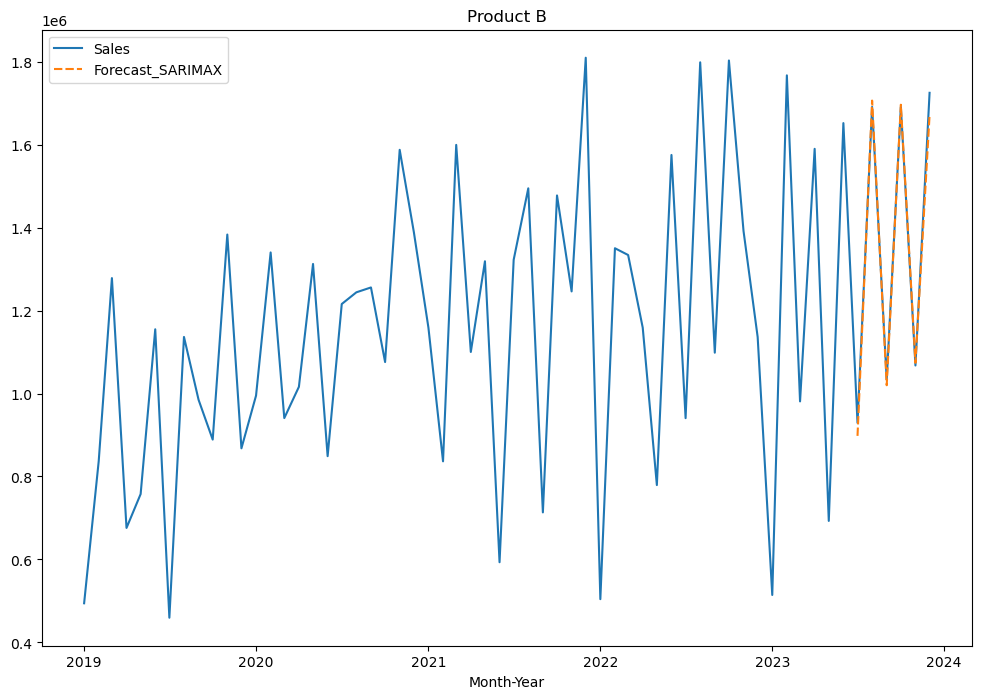

In [48]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_b[['Sales','Forecast_SARIMAX']])
plt.title('Product B')

In [49]:
mae_sarimax= mean_absolute_error(test['Sales'],forecast_test_sarima)
mape_sarimax= mean_absolute_percentage_error(test['Sales'],forecast_test_sarima)
mse_sarimax=mean_squared_error(test['Sales'], forecast_test_sarima)
rmse_sarimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_sarima))

print(f'MAE - SARIMAX: {round(mae_sarimax,3)}')
print(f'MAPE - SARIMAX: {round(mape_sarimax,3)}')
print(f'MSE - SARIMAX: {round(mse_sarimax,3)}')
print(f'RMSE - SARIMAX: {round(rmse_sarimax,3)}')

MAE - SARIMAX: 20931.605
MAPE - SARIMAX: 0.016
MSE - SARIMAX: 723712588.32
RMSE - SARIMAX: 26901.907


# AUTO-ARIMA

In [50]:
import pmdarima as pm

In [51]:
auto_arima= pm.auto_arima(train['Sales'], start_p=0, d=1, start_q=0, max_p=5,max_q=3,
                          start_P=0, D=0, start_Q=0, max_P=2 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1559.555, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1557.064, Time=0.07 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=1556.276, Time=0.29 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1559.598, Time=0.04 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1557.081, Time=0.13 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=1558.274, Time=0.29 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=1557.757, Time=0.13 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=1557.940, Time=0.57 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=1559.793, Time=0.47 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1520.667, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1515.886, Time=0.08 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1517.437, Time=0.21 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1520.840, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1516.194, Time=0.16 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=0.74 sec


ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True)

In [52]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   54
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood                -747.556
Date:                            Thu, 09 May 2024   AIC                           1505.112
Time:                                    15:51:39   BIC                           1514.963
Sample:                                01-01-2019   HQIC                          1508.900
                                     - 06-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.996e+04    1.3e+04      1.538      0.124   -5479.007    4.54e+04
ar.L1         -0.4477      0.171     -2.614      0.009      -0.783      -0.112
ma.L1         -0.8422      0.121     -6.986      0.000      -1.079      -0.606
ma.S.L12       0.4670      0.199      2.349      0.019       0.077       0.857
sigma2      1.092e+11      0.002   5.39e+13      0.000    1.09e+11    1.09e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 1.25
Prob(Q):                              0.63   Prob(JB):                         0.54
Heteroskedasticity (H):               1.21   Skew:                            -0.37
Prob(H) (two-sided):                  0.69   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.18e+29. Standard errors may be unstable.
"""

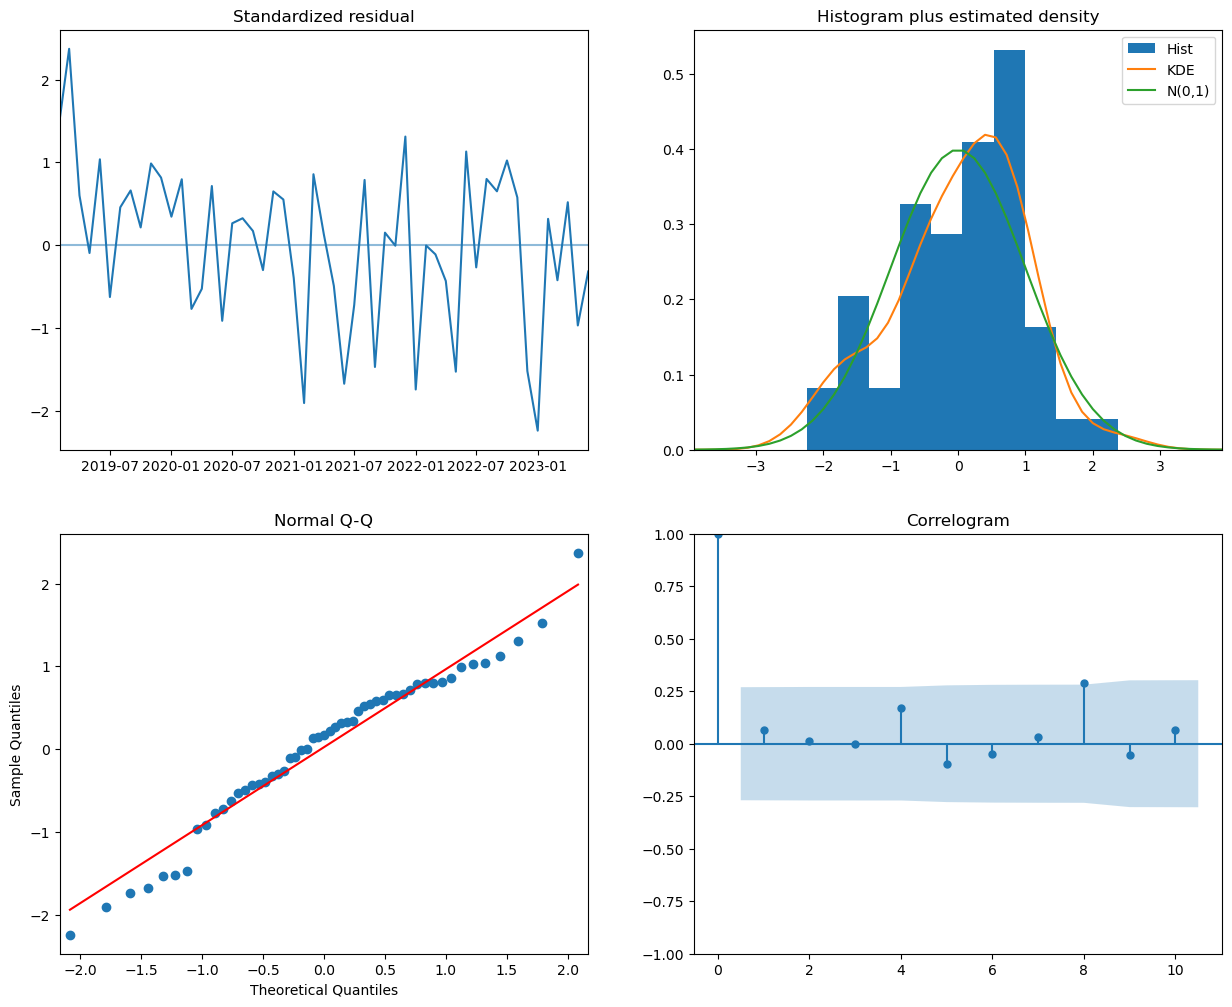

In [53]:
auto_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [54]:
forecast_test_auto= auto_arima.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_b['Forecast_AUTO ARIMAX']=[None]*len(train)+ list(forecast_test_auto)
#sales_b[['Sales','Forecast_AUTO ARIMA']].plot()

Text(0.5, 1.0, 'Product B')

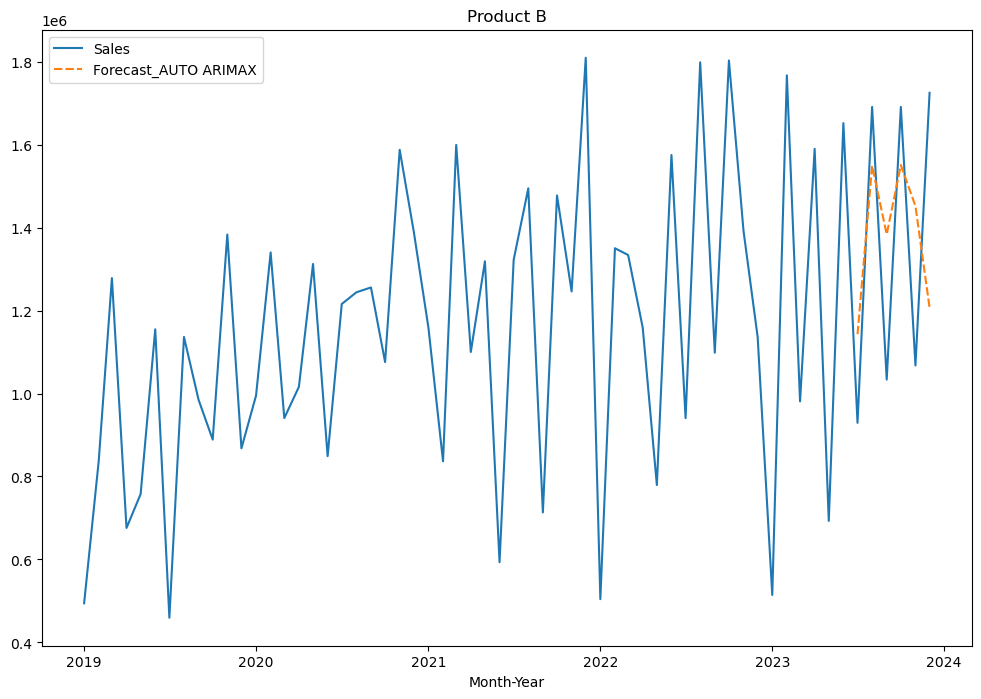

In [55]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_b[['Sales','Forecast_AUTO ARIMAX']])
plt.title('Product B')

In [56]:
mae_auto_arimax= mean_absolute_error(test['Sales'],forecast_test_auto)
mape_auto_arimax= mean_absolute_percentage_error(test['Sales'],forecast_test_auto)
mse_auto_arimax=mean_squared_error(test['Sales'],forecast_test_auto)
rmse_auto_arimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto))

print(f'MAE - AUTO ARIMAX: {mae_auto_arimax}')
print(f'MAPE - AUTO ARIMAX: {mape_auto_arimax}')
print(f'MSE - AUTO ARIMAX: {mse_auto_arimax}')
print(f'RMSE - AUTO ARIMAX: {rmse_auto_arimax}')

MAE - AUTO ARIMAX: 291387.67920569534
MAPE - AUTO ARIMAX: 0.23262955579809455
MSE - AUTO ARIMAX: 104031582112.00275
RMSE - AUTO ARIMAX: 322539.2722010806


In [57]:
sales_b.tail(12)

,Sales,Market Size,Marketing Expense,Forecast_ARIMAX,Forecast_SARIMAX,Forecast_AUTO ARIMAX
Month-Year,,,,,,
2023-01-01,514369,2955148,236101,NaN,NaN,NaN
2023-02-01,1767039,10151977,811092,NaN,NaN,NaN
2023-03-01,981026,5636182,450302,NaN,NaN,NaN
2023-04-01,1589911,9134343,729788,NaN,NaN,NaN
2023-05-01,692905,3980872,318051,NaN,NaN,NaN
2023-06-01,1651940,9490711,758260,NaN,NaN,NaN
2023-07-01,929333,5339196,426575,9.276993e+05,8.979147e+05,1.142956e+06
2023-08-01,1690948,9714819,776165,1.707243e+06,1.706237e+06,1.548951e+06
2023-09-01,1033615,5938316,474441,1.028377e+06,1.019961e+06,1.383607e+06


In [58]:
sales_b.mean()

Sales                   1.166948e+06
Market Size             6.014570e+06
Marketing Expense       3.312196e+05
Forecast_ARIMAX         1.356357e+06
Forecast_SARIMAX        1.344297e+06
Forecast_AUTO ARIMAX    1.380847e+06
dtype: float64

In [59]:
sales_b.tail(12)

,Sales,Market Size,Marketing Expense,Forecast_ARIMAX,Forecast_SARIMAX,Forecast_AUTO ARIMAX
Month-Year,,,,,,
2023-01-01,514369,2955148,236101,NaN,NaN,NaN
2023-02-01,1767039,10151977,811092,NaN,NaN,NaN
2023-03-01,981026,5636182,450302,NaN,NaN,NaN
2023-04-01,1589911,9134343,729788,NaN,NaN,NaN
2023-05-01,692905,3980872,318051,NaN,NaN,NaN
2023-06-01,1651940,9490711,758260,NaN,NaN,NaN
2023-07-01,929333,5339196,426575,9.276993e+05,8.979147e+05,1.142956e+06
2023-08-01,1690948,9714819,776165,1.707243e+06,1.706237e+06,1.548951e+06
2023-09-01,1033615,5938316,474441,1.028377e+06,1.019961e+06,1.383607e+06


In [185]:
data = {
    'model': ['ARIMAX', 'AUTO ARIMAX', 'SEASONAL ARIMAX'],
    'MAE': [mae_arimax, mae_auto_arimax, mae_sarimax],  
    'MAPE': [mape_arimax, mape_auto_arimax, mape_sarimax],  
    'MSE': [mse_arimax, mse_auto_arimax, mse_sarimax],  
    'RMSE': [rmse_arimax, rmse_auto_arimax, rmse_sarimax]  
}

model_results = pd.DataFrame(data)
model_results.set_index('model', inplace=True)
model_results

,MAE,MAPE,MSE,RMSE
model,,,,
ARIMAX,7077.441387,0.004927,7.910644e+07,8894.180235
AUTO ARIMAX,129784.560914,0.104798,1.985243e+10,140898.653558
SEASONAL ARIMAX,22623.883877,0.016210,7.156900e+08,26752.382946


# TESTING

In [23]:
auto_arima_1= pm.auto_arima(train['Sales'], start_p=0, start_q=0, max_p=5,max_q=3,
                          start_P=0, start_Q=0, max_P=2 ,max_Q=2 , D=None, 
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima_1

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1559.555, Time=0.04 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1557.064, Time=0.04 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=1556.276, Time=0.16 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1559.598, Time=0.07 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1557.081, Time=0.10 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=1558.274, Time=0.22 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=1557.757, Time=0.09 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=1557.940, Time=0.41 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=1559.793, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1520.667, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1515.886, Time=0.06 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1517.437, Time=0.17 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1520.840, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1516.194, Time=0.12 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=0.61 sec


ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True)

In [24]:
auto_arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   54
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood                -747.556
Date:                            Wed, 08 May 2024   AIC                           1505.112
Time:                                    18:33:57   BIC                           1514.963
Sample:                                01-01-2019   HQIC                          1508.900
                                     - 06-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.996e+04    1.3e+04      1.538      0.124   -5479.007    4.54e+04
ar.L1         -0.4477      0.171     -2.614      0.009      -0.783      -0.112
ma.L1         -0.8422      0.121     -6.986      0.000      -1.079      -0.606
ma.S.L12       0.4670      0.199      2.349      0.019       0.077       0.857
sigma2      1.092e+11      0.002   5.39e+13      0.000    1.09e+11    1.09e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 1.25
Prob(Q):                              0.63   Prob(JB):                         0.54
Heteroskedasticity (H):               1.21   Skew:                            -0.37
Prob(H) (two-sided):                  0.69   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.18e+29. Standard errors may be unstable.
"""

In [26]:
forecast_test_auto_1= auto_arima_1.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_b['Forecast_AUTO ARIMA_1']=[None]*len(train)+ list(forecast_test_auto_1)

Text(0.5, 1.0, 'Product B')

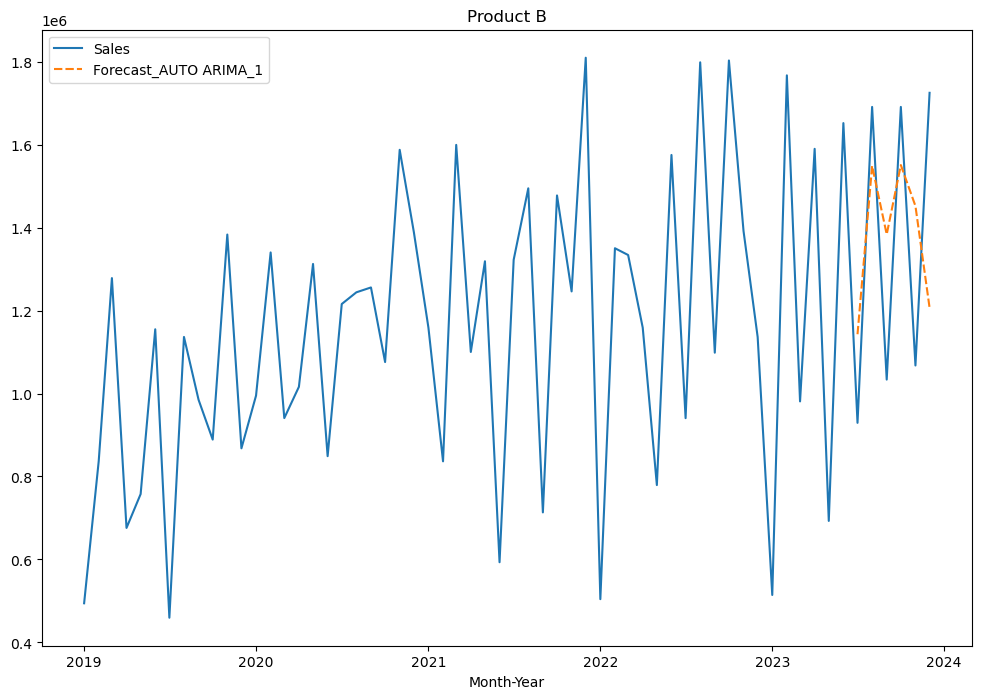

In [27]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_b[['Sales','Forecast_AUTO ARIMA_1']])
plt.title('Product B')

In [28]:
mae_auto_arima_1= mean_absolute_error(test['Sales'],forecast_test_auto_1)
mape_auto_arima_1= mean_absolute_percentage_error(test['Sales'],forecast_test_auto_1)
mse_auto_arima_1=mean_squared_error(test['Sales'],forecast_test_auto_1)
rmse_auto_arima_1= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto_1))

print(f'MAE - AUTO ARIMA: {mae_auto_arima_1}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima_1}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima_1}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima_1}')

MAE - AUTO ARIMA: 291387.67920569534
MAPE - AUTO ARIMA: 0.23262955579809455
MSE - AUTO ARIMA: 104031582112.00275
RMSE - AUTO ARIMA: 322539.2722010806
